## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
#l2
from keras.regularizers import l2 
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l2_ration=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ration))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ration))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [17]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [18]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    #keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ration=regulizer_ratio)
    #model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 70us/step - loss: 15.0521 - accuracy: 0.2722 - val_loss: 13.9300 - val_accuracy: 0.3347
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 12.9944 - accuracy: 0.3559 - val_loss: 12.1085 - val_accuracy: 0.3731
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 11.3254 - accuracy: 0.3812 - val_loss: 10.5720 - val_accuracy: 0.3901
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 9.9142 - accuracy: 0.3960 - val_loss: 9.2813 - val_accuracy: 0.4002
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 8.7173 - accuracy: 0.4070 - val_loss: 8.1723 - val_accuracy: 0.4123
Epoch 6/50
50000/50000 [============================

50000/50000 [==============================] - 4s 71us/step - loss: 2.1725 - accuracy: 0.2713 - val_loss: 2.0087 - val_accuracy: 0.3418
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9436 - accuracy: 0.3652 - val_loss: 1.8925 - val_accuracy: 0.3867
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8557 - accuracy: 0.3977 - val_loss: 1.8260 - val_accuracy: 0.4055
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7993 - accuracy: 0.4173 - val_loss: 1.7799 - val_accuracy: 0.4207
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7529 - accuracy: 0.4351 - val_loss: 1.7497 - val_accuracy: 0.4315
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7146 - accuracy: 0.4481 - val_loss: 1.7114 - val_accuracy: 0.4421
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6825 - accuracy: 0.4563 - val_loss: 1.6878 - val

Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5775 - accuracy: 0.4461 - val_loss: 1.5715 - val_accuracy: 0.4423
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5419 - accuracy: 0.4592 - val_loss: 1.5441 - val_accuracy: 0.4536
Epoch 8/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5124 - accuracy: 0.4690 - val_loss: 1.5173 - val_accuracy: 0.4641
Epoch 9/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.4858 - accuracy: 0.4777 - val_loss: 1.4974 - val_accuracy: 0.4677
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4598 - accuracy: 0.4859 - val_loss: 1.5367 - val_accuracy: 0.4535
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4366 - accuracy: 0.4947 - val_loss: 1.4648 - val_accuracy: 0.4784
Epoch 12/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4152 - accuracy: 0.5015 - val_loss

Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4287 - accuracy: 0.4991 - val_loss: 1.4634 - val_accuracy: 0.4799
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4044 - accuracy: 0.5078 - val_loss: 1.4385 - val_accuracy: 0.4893
Epoch 13/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3832 - accuracy: 0.5124 - val_loss: 1.4290 - val_accuracy: 0.4956
Epoch 14/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3627 - accuracy: 0.5218 - val_loss: 1.4229 - val_accuracy: 0.4952
Epoch 15/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3442 - accuracy: 0.5270 - val_loss: 1.4308 - val_accuracy: 0.4917
Epoch 16/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3262 - accuracy: 0.5324 - val_loss: 1.3900 - val_accuracy: 0.5108
Epoch 17/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3072 - accuracy: 0.5398 - val_

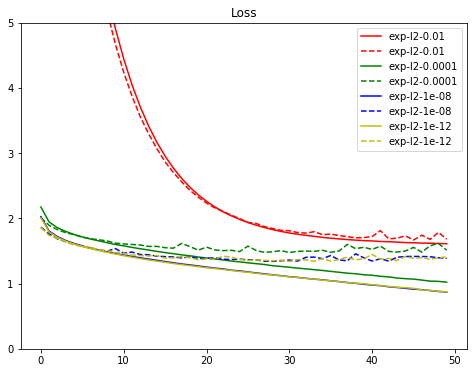

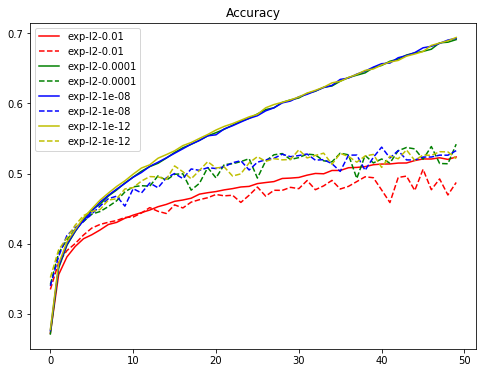

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [20]:
#l1
from keras.regularizers import l1
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l1_ration=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ration))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ration))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [22]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    #keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ration=regulizer_ratio)
    #model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 198.5751 - accuracy: 0.2341 - val_loss: 41.0384 - val_accuracy: 0.2500
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 19.0415 - accuracy: 0.1172 - val_loss: 7.2540 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 4.1029 - accuracy: 0.1000 - val_loss: 2.6513 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.4868 - accuracy: 0.0982 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.4626 - accuracy: 0.0982 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.4626 - accuracy: 0.0968 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [===

50000/50000 [==============================] - 3s 66us/step - loss: 5.3424 - accuracy: 0.4300 - val_loss: 5.2997 - val_accuracy: 0.4292
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.2413 - accuracy: 0.4427 - val_loss: 5.2098 - val_accuracy: 0.4437
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.1460 - accuracy: 0.4536 - val_loss: 5.1211 - val_accuracy: 0.4413
Epoch 8/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.0564 - accuracy: 0.4648 - val_loss: 5.0224 - val_accuracy: 0.4634
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 4.9668 - accuracy: 0.4752 - val_loss: 4.9510 - val_accuracy: 0.4621
Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 4.8807 - accuracy: 0.4838 - val_loss: 4.8707 - val_accuracy: 0.4721
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 4.8008 - accuracy: 0.4904 - val_loss: 4.7858 - v

Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4592 - accuracy: 0.4858 - val_loss: 1.5027 - val_accuracy: 0.4647
Epoch 11/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4366 - accuracy: 0.4945 - val_loss: 1.4680 - val_accuracy: 0.4776
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4128 - accuracy: 0.5025 - val_loss: 1.4524 - val_accuracy: 0.4829
Epoch 13/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.3930 - accuracy: 0.5087 - val_loss: 1.4752 - val_accuracy: 0.4778
Epoch 14/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.3733 - accuracy: 0.5155 - val_loss: 1.4458 - val_accuracy: 0.4865
Epoch 15/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.3530 - accuracy: 0.5222 - val_loss: 1.4267 - val_accuracy: 0.4914
Epoch 16/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.3344 - accuracy: 0.5297 - val_

Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8500 - accuracy: 0.7021 - val_loss: 1.3619 - val_accuracy: 0.5423


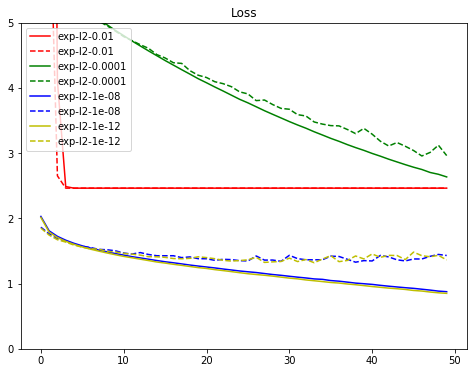

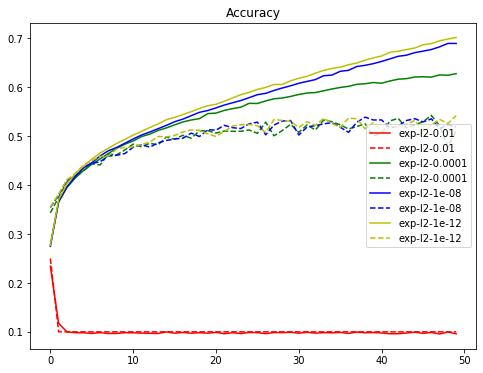

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()